# Importing Packages

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from plotly import graph_objs as go
import pandas as pd
import os
import seaborn as sns
from tqdm.notebook import tqdm

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Extracting the Data

In [ ]:
filenames = os.listdir('/content/gdrive/MyDrive/Catvsdog_Kaggle/train/')
labels = [str(x)[:3] for x in filenames]
#store the data in dataframe
train_df = pd.DataFrame({'filename': filenames, 'label': labels})
train_df.head()

,filename,label
0,cat.9115.jpg,cat
1,cat.9068.jpg,cat
2,cat.9108.jpg,cat
3,cat.9089.jpg,cat
4,cat.9117.jpg,cat


In [ ]:
#changing the label to 0 and 1
train_df['label'] = train_df['label'].map({'dog': '1', 'cat':'0'})
train_df.head()

,filename,label
0,cat.9115.jpg,0
1,cat.9068.jpg,0
2,cat.9108.jpg,0
3,cat.9089.jpg,0
4,cat.9117.jpg,0


In [ ]:
pd.DataFrame(train_df['label'].value_counts().reset_index())

,index,label
0,0,12500
1,1,12500


In [ ]:
#creating the Dataframe with shape of the image along side it
dims_dict = {'image': [], 'width': [], 'height': [], 'channels': []}
for i in tqdm(range(len(train_df))):
    dims = mpimg.imread('/content/gdrive/MyDrive/Catvsdog_Kaggle/train/'+train_df['filename'][i]).shape
    dims_dict['image'].append(train_df['filename'][i])
    dims_dict['height'].append(dims[0])
    dims_dict['width'].append(dims[1])
    dims_dict['channels'].append(dims[2])

dims_df = pd.DataFrame(dims_dict)
dims_df.head()

,image,width,height,channels
0,cat.9115.jpg,499,400,3
1,cat.9068.jpg,500,465,3
2,cat.9108.jpg,499,333,3
3,cat.9089.jpg,404,499,3
4,cat.9117.jpg,375,499,3


# Exploratory Data Analysis

## Image Height Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



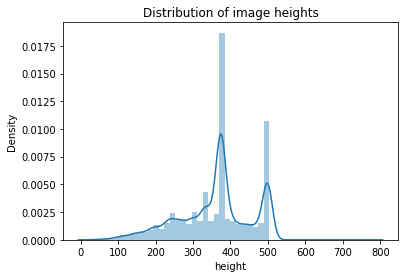

In [ ]:
sns.distplot(dims_df['height'])
plt.title('Image heights distribution');
plt.show()

## Image width distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



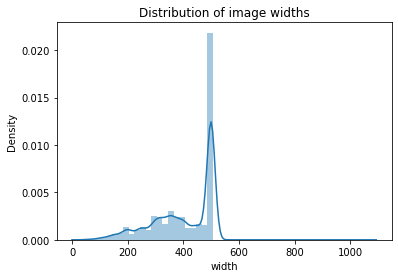

In [ ]:
sns.distplot(dims_df['width'])
plt.title('Image widths distribution');

In [ ]:
dims_df['label'] = dims_df['image'].apply(lambda x: x[:3])
dims_df.head(3)

,image,width,height,channels,label
0,cat.9115.jpg,499,400,3,cat
1,cat.9068.jpg,500,465,3,cat
2,cat.9108.jpg,499,333,3,cat


## Heights distribution between cats and dogs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



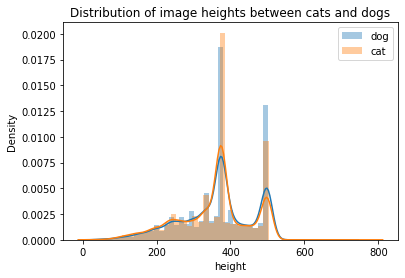

In [ ]:
sns.distplot(dims_df[dims_df['label']=='dog']['height'], label='dog')
sns.distplot(dims_df[dims_df['label']=='cat']['height'], label='cat')
plt.title('Heights distribution between cats and dogs')
plt.legend();
plt.show()